In [1]:
#importing the necessary libraries

#numpy and pandas package
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import the warnings
import warnings

#import the standard scaler
#from sklearn.preprocessing import StandardScaler

#configuration settings
%matplotlib inline
warnings.filterwarnings('ignore') ## Surpress the warnings

#import the metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
# loading the train and test data set
train=pd.read_csv('train_.csv')
train


,MonthlyCharge,DataUsage,DayMins,OverageFee,DataPlan,AccountWeeks,RoamMins,ContractRenewal,DayCalls,CustServCalls,Churn
0,47.0,0.00,198.1,7.84,0,80,9.3,1,160,3,0
1,43.0,0.00,168.2,8.09,0,28,10.1,1,87,3,0
2,56.0,0.00,252.0,7.51,0,120,9.6,1,120,2,0
3,58.0,0.00,251.6,8.76,0,105,5.4,1,88,1,0
4,78.5,1.65,247.2,11.28,1,134,6.1,1,105,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2661,31.0,0.00,72.7,10.43,0,27,9.9,1,75,1,0
2662,50.9,1.59,97.8,10.36,1,89,5.9,1,98,0,0
2663,42.0,0.00,131.4,10.99,0,93,11.1,0,78,1,1
2664,53.0,0.00,189.3,11.97,0,91,9.9,1,100,3,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MonthlyCharge    2666 non-null   float64
 1   DataUsage        2666 non-null   float64
 2   DayMins          2666 non-null   float64
 3   OverageFee       2666 non-null   float64
 4   DataPlan         2666 non-null   int64  
 5   AccountWeeks     2666 non-null   int64  
 6   RoamMins         2666 non-null   float64
 7   ContractRenewal  2666 non-null   int64  
 8   DayCalls         2666 non-null   int64  
 9   CustServCalls    2666 non-null   int64  
 10  Churn            2666 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 229.2 KB


In [4]:
#typecasting "churn","contract renewal" and "Dataplan" to category type
train['Churn'] = train['Churn'].astype('category')
train['ContractRenewal'] =train['ContractRenewal'].astype('category')
train['DataPlan'] = train['DataPlan'].astype('category')


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MonthlyCharge    2666 non-null   float64 
 1   DataUsage        2666 non-null   float64 
 2   DayMins          2666 non-null   float64 
 3   OverageFee       2666 non-null   float64 
 4   DataPlan         2666 non-null   category
 5   AccountWeeks     2666 non-null   int64   
 6   RoamMins         2666 non-null   float64 
 7   ContractRenewal  2666 non-null   category
 8   DayCalls         2666 non-null   int64   
 9   CustServCalls    2666 non-null   int64   
 10  Churn            2666 non-null   category
dtypes: category(3), float64(5), int64(3)
memory usage: 174.9 KB


In [6]:
train.describe()

,MonthlyCharge,DataUsage,DayMins,OverageFee,AccountWeeks,RoamMins,DayCalls,CustServCalls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,56.320930,0.809400,179.960315,10.081515,100.351463,10.240548,100.424231,1.554389
std,16.341468,1.271081,54.233805,2.551629,39.902158,2.813472,20.116856,1.317883
min,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,45.000000,0.000000,144.650000,8.350000,73.000000,8.500000,87.000000,1.000000
50%,53.100000,0.000000,179.400000,10.125000,100.000000,10.300000,100.000000,1.000000
75%,66.175000,1.760000,216.000000,11.810000,127.000000,12.100000,114.000000,2.000000
max,111.300000,5.400000,350.800000,18.190000,232.000000,20.000000,165.000000,9.000000


In [7]:
X=train[['MonthlyCharge','DataUsage','DayMins','OverageFee','AccountWeeks','RoamMins','DayCalls','CustServCalls']]
y=train[['Churn']]

Text(0.5, 1.0, 'ORIGINAL DATA')

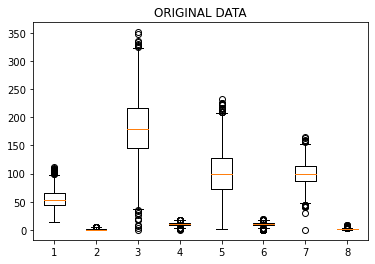

In [8]:
#boxplot of original data
plt.boxplot(X)
plt.title('ORIGINAL DATA')

## Min Max Scaler 

In [9]:
#importing the necessary libraries
from sklearn.preprocessing import MinMaxScaler

#standardizing the independendent variables
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=['MonthlyCharge','DataUsage','DayMins','OverageFee','AccountWeeks','RoamMins','DayCalls','CustServCalls'])
X_scaled

,MonthlyCharge,DataUsage,DayMins,OverageFee,AccountWeeks,RoamMins,DayCalls,CustServCalls
0,0.339157,0.000000,0.564709,0.431006,0.341991,0.465,0.969697,0.333333
1,0.298047,0.000000,0.479475,0.444750,0.116883,0.505,0.527273,0.333333
2,0.431655,0.000000,0.718358,0.412864,0.515152,0.480,0.727273,0.222222
3,0.452210,0.000000,0.717218,0.481583,0.450216,0.270,0.533333,0.111111
4,0.662898,0.305556,0.704675,0.620121,0.575758,0.305,0.636364,0.222222
...,...,...,...,...,...,...,...,...
2661,0.174717,0.000000,0.207241,0.573392,0.112554,0.495,0.454545,0.111111
2662,0.379239,0.294444,0.278791,0.569544,0.380952,0.295,0.593939,0.000000
2663,0.287770,0.000000,0.374572,0.604178,0.398268,0.555,0.472727,0.111111
2664,0.400822,0.000000,0.539624,0.658054,0.389610,0.495,0.606061,0.333333


Text(0.5, 1.0, 'SCALED DATA')

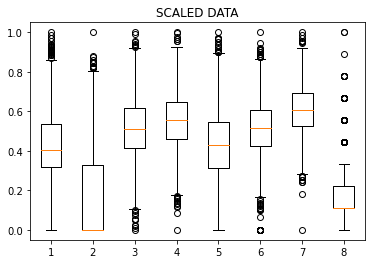

In [10]:
#boxplot of the standardized data.
plt.boxplot(X_scaled)
plt.title('SCALED DATA')

In [11]:
X_scaled.describe()


,MonthlyCharge,DataUsage,DayMins,OverageFee,AccountWeeks,RoamMins,DayCalls,CustServCalls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,0.434953,0.149889,0.513000,0.554234,0.430093,0.512027,0.608632,0.172710
std,0.167949,0.235385,0.154600,0.140276,0.172737,0.140674,0.121920,0.146431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318602,0.000000,0.412343,0.459043,0.311688,0.425000,0.527273,0.111111
50%,0.401850,0.000000,0.511403,0.556625,0.428571,0.515000,0.606061,0.111111
75%,0.536228,0.325926,0.615735,0.649258,0.545455,0.605000,0.690909,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Anomaly Detection

In [187]:
#identifying the outliers
#Monthly Charge Outliers
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers



MonthlyCharge_clean [-0.57049213 -0.81531411 -0.01964269 ... -0.8765196  -0.20325917
  0.71482323]


Text(0.5, 1.0, 'MonthlyCharge Boxplot-No Outliers')

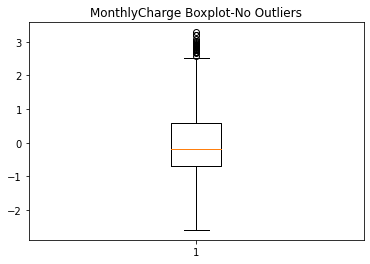

In [198]:
# MonthlyCharge 
sample_outliers = detect_outliers_iqr(X_std['MonthlyCharge'])
# Mean/Median imputation treatment
#computing the median
median=np.median(X_std['MonthlyCharge'])

#Replacing outliers with the median
for i in sample_outliers:
    c= np.where(X_std['MonthlyCharge']==i,-0.19713862432619955,X_std['MonthlyCharge'])
    
#print("MonthlyCharge_std ", X_std['MonthlyCharge'])
print("MonthlyCharge_clean",c)
#boxplot with no outliers
plt.boxplot(c)
plt.title('MonthlyCharge Boxplot-No Outliers')

custServ_clean [ 1.09712515  1.09712515  0.33819011 ... -0.42074493  1.09712515
  2.61499524]


Text(0.5, 1.0, 'MonthlyCharge Boxplot-No Outliers')

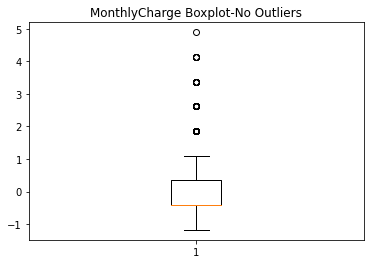

In [200]:
#cust serv calls
custServ_outliers = detect_outliers_iqr(X_std['CustServCalls'])
# Mean/Median imputation treatment
#computing the median
median=np.median(X_std['CustServCalls'])
median

#Replacing outliers with the median
for i in custServ_outliers:
    cs_clean= np.where(X_std['CustServCalls']==i,-0.4207449339408027,X_std['CustServCalls'])
    
#print("MonthlyCharge_std ", X_std['MonthlyCharge'])
print("custServ_clean",cs_clean)
#boxplot with no outliers
plt.boxplot(cs_clean)
plt.title('MonthlyCharge Boxplot-No Outliers')

### ***Notice:-The boxplots seem to remain the same even after treating the outliers

# Random Forest Feature Selection



In [12]:
#Random forest feature selection
from sklearn.ensemble import RandomForestClassifier

#defining the model
model=RandomForestClassifier()
#fitting the model
model.fit(X_scaled,y)
#get importance
model.feature_importances_
#summarize feature importance
feature_scores=pd.Series(model.feature_importances_,index=X_scaled.columns).sort_values(ascending=False)
feature_scores
#plot for feature importance
#plt.bar([X_std for X_std in range(len(feature_scores))],feature_scores)
#plt.show()


DayMins          0.211290
MonthlyCharge    0.174524
CustServCalls    0.149620
OverageFee       0.113196
DataUsage        0.110375
RoamMins         0.084531
AccountWeeks     0.079035
DayCalls         0.077429
dtype: float64

## Insights drawn from the analysis
#### -The most important variables include: DayMins,MonthlyCharge,CustServCalls,OverageFee,RoamMins.

# Recursive Feature Selection

In [13]:
# Recursive Feature Selection
from sklearn.feature_selection import RFE
forest=RandomForestClassifier()
rfe=RFE(estimator=forest,n_features_to_select=5,step=1)
rfe=rfe.fit(X_scaled,y)


In [14]:
print(X_scaled.columns[rfe.support_])

Index(['MonthlyCharge', 'DataUsage', 'DayMins', 'OverageFee', 'CustServCalls'], dtype='object')


Text(0.5, 1.0, 'BOXPLOT OF IMPORTANT FEATURES')

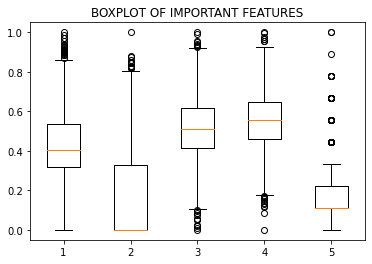

In [16]:
#creating a df with the important features
X_scaled=X_scaled[['MonthlyCharge','DataUsage','DayMins','OverageFee','CustServCalls']]
plt.boxplot(X_scaled)
plt.title('BOXPLOT OF IMPORTANT FEATURES')


In [17]:
#loading the testing data
test=pd.read_csv('test_.csv')
X_test=test[['MonthlyCharge','DataUsage','DayMins','OverageFee','CustServCalls']]
y_test=test[['Churn']]
#standardizing the values
X_test_scaled=scaler.fit_transform(X_test)
X_test_std=pd.DataFrame(X_test_scaled,columns=['MonthlyCharge','DataUsage','DayMins','OverageFee','CustServCalls'])



In [18]:
X_test_std.describe()

,MonthlyCharge,DataUsage,DayMins,OverageFee,CustServCalls
count,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.402690,0.185253,0.518491,0.507229,0.199588
std,0.186356,0.280605,0.160516,0.160136,0.163290
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.000000,0.403707,0.399157,0.125000
50%,0.377778,0.000000,0.519548,0.506485,0.125000
75%,0.512778,0.423246,0.633652,0.612516,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# MODEL SELECTION


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       579
           1       0.62      0.06      0.10        88

    accuracy                           0.87       667
   macro avg       0.75      0.53      0.52       667
weighted avg       0.84      0.87      0.82       667



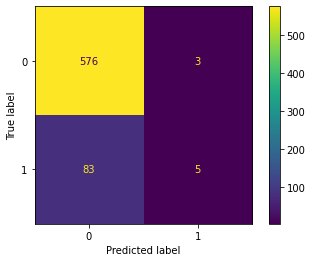

In [19]:
## 1.Logistic regression model before applying SMOTE algorithm
#importing the necessary libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#fitting the model
sklearn_logistic_regression_model=LogisticRegression()
model1=sklearn_logistic_regression_model.fit(X_scaled,y)
#predict
y_pred=sklearn_logistic_regression_model.predict(X_test_scaled)
y_pred
#plot of a confusion matrix
#loading library
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=model1,X=X_test_scaled,y_true=y_test)
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       579
           1       0.70      0.53      0.61        88

    accuracy                           0.91       667
   macro avg       0.82      0.75      0.78       667
weighted avg       0.90      0.91      0.90       667



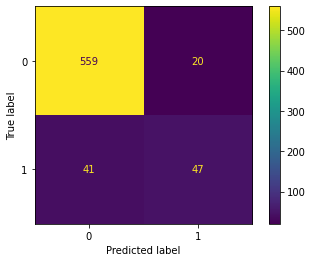

In [20]:
## 2.Random Forest Model before applying SMOTE algorithm

#Creating a model with 100 trees
random_forest_model=RandomForestClassifier(n_estimators=100,bootstrap=True)
model2=random_forest_model.fit(X_scaled,y)
model2
#making predictions
random_forest_pred=random_forest_model.predict(X_test_scaled)
random_forest_pred
#plotting a confusion matrix
plot_confusion_matrix(estimator=model2,X=X_test_scaled,y_true=y_test)
#classification report
print(classification_report(y_test, random_forest_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       579
           1       0.00      0.00      0.00        88

    accuracy                           0.87       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.75      0.87      0.81       667



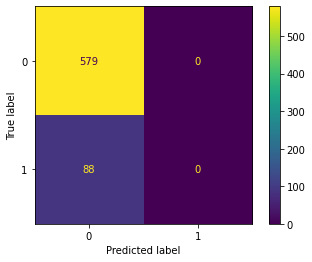

In [21]:
## 3.SVM Model before applying SMOTE algorithm

#importing the necessary libraries
from sklearn.svm import SVC
#using sklearn
svc_model=SVC(C=.1,gamma=1,kernel='linear')
model3=svc_model.fit(X_scaled,y)
model3
#making predictions
svc_pred=svc_model.predict(X_test_scaled)
svc_pred
#plotting a confusion matrix
plot_confusion_matrix(estimator=model3,X=X_test_scaled,y_true=y_test)
#classification report
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       579
           1       0.41      0.24      0.30        88

    accuracy                           0.85       667
   macro avg       0.65      0.59      0.61       667
weighted avg       0.83      0.85      0.84       667



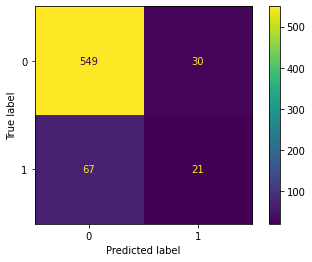

In [22]:
## 4.Naive Bayes Model before applying SMOTE algorithm

#importing the necessary librariess
from sklearn import naive_bayes

#fitting model
naive_bayes_model=naive_bayes.GaussianNB()
model4=naive_bayes_model.fit(X_scaled,y)
model4
#predicting the results
naive_bayes_pred = naive_bayes_model.predict(X_test_scaled)
naive_bayes_pred
#plotting the confusion matrix
plot_confusion_matrix(estimator=model4,X=X_test_scaled,y_true=y_test)
#classification report
print(classification_report(y_test, naive_bayes_pred))


              precision    recall  f1-score   support

           0       0.93      0.86      0.90       579
           1       0.39      0.59      0.47        88

    accuracy                           0.83       667
   macro avg       0.66      0.73      0.68       667
weighted avg       0.86      0.83      0.84       667



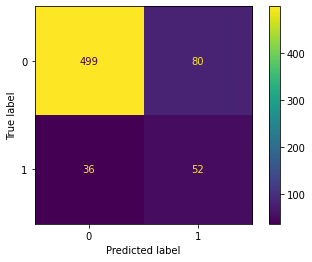

In [23]:
## 5.DECISION TREE before applying SMOTE algorithm

# Import Model
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier


#fitting the model
decision_trees_model = DecisionTreeClassifier()
model5=decision_trees_model.fit(X_scaled, y)
#prediction of results
decision_trees_pred = decision_trees_model.predict(X_test_scaled)
decision_trees_pred
#confusion matrix
plot_confusion_matrix(estimator=model5,X=X_test_scaled,y_true=y_test)
#classification report
print(classification_report(y_test, decision_trees_pred))

In [41]:
# MLP CLASSIFIER
# Importing MLP Classifier
from sklearn.neural_network import MLPClassifier

#initializing the MLP Classifier
classifier=MLPClassifier(max_iter=300,activation='relu',solver='adam',random_state=1)
classifier.out_activation_('softmax')

#fitting the training data to the network
model6=classifier.fit(X_scaled,y)
model6
#using the trained network to predict
#predicting y_test from x_test
MLP_pred=classifier.predict(X_test_scaled)
MLP_pred
#confusion matrix
plot_confusion_matrix(estimator=model6,X=X_test_scaled,y_true=y_test)
#classification report
print(classification_report(y_test, MLP_pred))


AttributeError: 'MLPClassifier' object has no attribute 'out_activation_'

In [40]:
classifier.out_activation('softmax')

AttributeError: 'MLPClassifier' object has no attribute 'out_activation'

In [28]:
model6

MLPClassifier(max_iter=300, random_state=1)

In [29]:
MLP_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

## SMOTE ALGORITHM FOR OVERSAMPLING

In [31]:
#importing the necessary libraries
from imblearn.over_sampling import SMOTE
# applying the smote algorithm
sm=SMOTE(random_state=12,sampling_strategy="not majority")
X_balanced,y_balanced=sm.fit_resample(X_scaled,y)

In [32]:
#value count of the new y generates
y_balanced.value_counts()

Churn
0        2271
1        2271
dtype: int64

In [33]:
X_test_balanced,y_test_balanced=sm.fit_resample(X_test_scaled,y_test)
#value count
y_test_balanced.value_counts()

Churn
0        579
1        579
dtype: int64

## FITTING MODELS ON THE BALANCED DATASET 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       579
           1       0.77      0.69      0.73       579

    accuracy                           0.74      1158
   macro avg       0.74      0.74      0.74      1158
weighted avg       0.74      0.74      0.74      1158



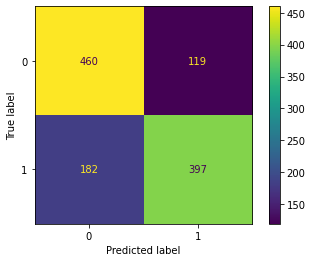

In [34]:
# 1.Random Forest Model after applying SMOTE algorithm 
#Fitting the model
random_forest_model=RandomForestClassifier(n_estimators=100,bootstrap=True)
RFmodel=random_forest_model.fit(X_balanced,y_balanced)
#making predictions
random_forest_predB=random_forest_model.predict(X_test_balanced)
random_forest_predB
#plotting a confusion matrix
plot_confusion_matrix(estimator=RFmodel,X=X_test_balanced,y_true=y_test_balanced)
print(classification_report(y_test_balanced, random_forest_predB))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       579
           1       0.74      0.68      0.71       579

    accuracy                           0.72      1158
   macro avg       0.72      0.72      0.72      1158
weighted avg       0.72      0.72      0.72      1158



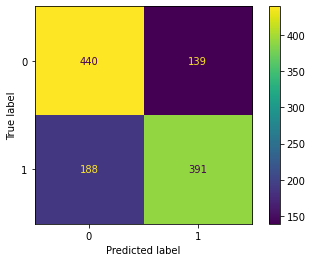

In [116]:
# 2.NAIVE BAYES MODEL after applying SMOTE algorithm balancing dataset
#fitting the model
naive_bayes_model=naive_bayes.GaussianNB()
NBmodel=naive_bayes_model.fit(X_res,y_res)
#making predictions
naive_bayes_predB = naive_bayes_model.predict(X_testB)
naive_bayes_predB
#plotting a cnfusion matrix
plot_confusion_matrix(estimator=NBmodel,X=X_testB,y_true=y_testB)
#print classification report
print(classification_report(y_testB, naive_bayes_predB))


              precision    recall  f1-score   support

           0       0.69      0.71      0.70       579
           1       0.70      0.68      0.69       579

    accuracy                           0.70      1158
   macro avg       0.70      0.70      0.70      1158
weighted avg       0.70      0.70      0.70      1158



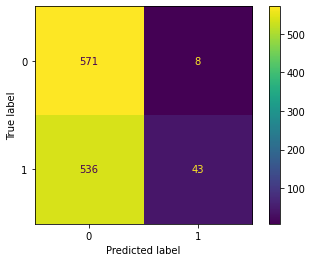

In [119]:
# 3.LOGISTIC REGRESSION after appling SMOTE algorithm balancing dataset
#fitting the model
sklearn_logistic_regression_model=LogisticRegression()
LRmodel=sklearn_logistic_regression_model.fit(X_res,y_res)
#predict
logistic_predB=sklearn_logistic_regression_model.predict(X_testB)
logistic_predB
#plot of confusion matrix
plot_confusion_matrix(estimator=model1,X=X_testB,y_true=y_testB)
#classification report
print(classification_report(y_testB,logistic_predB))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       579
           1       0.70      0.68      0.69       579

    accuracy                           0.70      1158
   macro avg       0.70      0.70      0.70      1158
weighted avg       0.70      0.70      0.70      1158



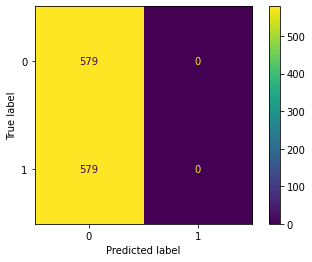

In [120]:
# 4.SVM MODEL after applying SMOTE algorithm.
#fitting the model
svc_model=SVC(C=.1,gamma=1,kernel='linear')
SVmodel=svc_model.fit(X_res,y_res)
#making predictions
svc_predB=svc_model.predict(X_testB)
svc_predB
#confusion matrix.
plot_confusion_matrix(estimator=model3,X=X_testB,y_true=y_testB)
#classification report
print(classification_report(y_testB,svc_predB))




              precision    recall  f1-score   support

           0       0.72      0.81      0.76       579
           1       0.78      0.68      0.73       579

    accuracy                           0.74      1158
   macro avg       0.75      0.74      0.74      1158
weighted avg       0.75      0.74      0.74      1158



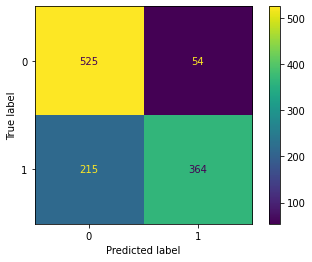

In [121]:
# 5.Decision Tree after applying SMOTE algorithm.

#fitting the model
decision_trees_model = DecisionTreeClassifier()
DTmodel=decision_trees_model.fit(X_res, y_res)
#prediction of results
decision_trees_predB = decision_trees_model.predict(X_testB)
decision_trees_predB
#confusion matrix
plot_confusion_matrix(estimator=model5,X=X_testB,y_true=y_testB)

#classification report
print(classification_report(y_testB, decision_trees_predB))


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       579
           1       0.85      0.70      0.77       579

    accuracy                           0.79      1158
   macro avg       0.80      0.79      0.79      1158
weighted avg       0.80      0.79      0.79      1158



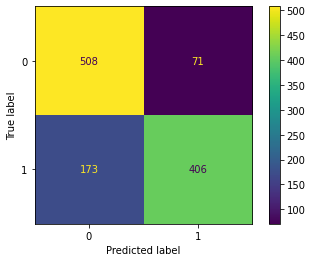

In [37]:
# MLP CLASSIFIER
# Importing MLP Classifier
from sklearn.neural_network import MLPClassifier

#initializing the MLP Classifier
classifier=MLPClassifier(max_iter=300,activation='relu',solver='adam',random_state=1)

#fitting the training data to the network
model6=classifier.fit(X_balanced,y_balanced)
model6
#using the trained network to predict
#predicting y_test from x_test
MLP_pred=classifier.predict(X_test_balanced)
MLP_pred
#confusion matrix
plot_confusion_matrix(estimator=model6,X=X_test_balanced,y_true=y_test_balanced)
#classification report
print(classification_report(y_test_balanced, MLP_pred))
